In [1]:
import numpy as np
import pandas as pd
import pickle as pl
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

# NO DP

In [151]:
path = "unprotected/ml-100k"
methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]

Ks = np.load("results/" + path + "/K.npy")

neighborhood_size_q = dict()
item_coverage_q = dict()
rating_overlap_q = dict()
mean_absolute_error_q = dict()
for m in methods:
    neighborhood_size_q[m] = np.load("results/" + path + "/neighborhood_size_q_" + m + ".npy")
    item_coverage_q[m] = np.load("results/" + path + "/item_coverage_q_" + m + ".npy")
    rating_overlap_q[m] = np.load("results/" + path + "/rating_overlap_q_" + m + ".npy")
    mean_absolute_error_q[m] = np.load("results/" + path + "/mae_q_" + m + ".npy")

In [134]:
%matplotlib qt
#%matplotlib inline

k_idx = 1
n_queries = 100

In [135]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].plot(range(n_queries), neighborhood_size_q["userknn"][k_idx][:n_queries], c="C0", linestyle="dashed", alpha=0.5)
axes[0].plot(range(n_queries), neighborhood_size_q["userknn_reuse"][k_idx][:n_queries], c="C0")
axes[0].plot(range(n_queries), neighborhood_size_q["expect"][k_idx][:n_queries], c="C1", linestyle="dashed", alpha=0.5)
axes[0].plot(range(n_queries), neighborhood_size_q["expect_reuse"][k_idx][:n_queries], c="C1")
axes[0].plot(range(n_queries), neighborhood_size_q["gain"][k_idx][:n_queries], c="C2", linestyle="dashed", alpha=0.5)
axes[0].plot(range(n_queries), neighborhood_size_q["gain_reuse"][1][:n_queries], c="C2")
axes[0].set_ylabel("Avg. Neighborhood Size")
axes[0].set_xlabel("Nr. of Queries")

axes[1].plot(range(n_queries), item_coverage_q["userknn"][k_idx][:n_queries], c="C0", linestyle="dashed", alpha=0.5)
axes[1].plot(range(n_queries), item_coverage_q["userknn_reuse"][k_idx][:n_queries], c="C0")
axes[1].plot(range(n_queries), item_coverage_q["expect"][k_idx][:n_queries], c="C1", linestyle="dashed", alpha=0.5)
axes[1].plot(range(n_queries), item_coverage_q["expect_reuse"][k_idx][:n_queries], c="C1")
axes[1].plot(range(n_queries), item_coverage_q["gain"][k_idx][:n_queries], c="C2", linestyle="dashed", alpha=0.5)
axes[1].plot(range(n_queries), item_coverage_q["gain_reuse"][k_idx][:n_queries], c="C2")
axes[1].set_ylabel("Avg. Item Coverage")
axes[1].set_xlabel("Nr. of Queries")

axes[2].plot(range(n_queries), rating_overlap_q["userknn"][k_idx][:n_queries], c="C0", linestyle="dashed", alpha=0.5)
axes[2].plot(range(n_queries), rating_overlap_q["userknn_reuse"][k_idx][:n_queries], c="C0")
axes[2].plot(range(n_queries), rating_overlap_q["expect"][k_idx][:n_queries], c="C1", linestyle="dashed", alpha=0.5)
axes[2].plot(range(n_queries), rating_overlap_q["expect_reuse"][k_idx][:n_queries], c="C1")
axes[2].plot(range(n_queries), rating_overlap_q["gain"][k_idx][:n_queries], c="C2", linestyle="dashed", alpha=0.5)
axes[2].plot(range(n_queries), rating_overlap_q["gain_reuse"][k_idx][:n_queries], c="C2")
axes[2].set_ylabel("Avg. Rating Overlap")
axes[2].set_xlabel("Nr. of Queries")

axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["userknn"][k_idx][1:n_queries+1], c="C0", linestyle="dashed", alpha=0.5)
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["userknn_reuse"][k_idx][1:n_queries+1], c="C0")
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["expect"][k_idx][1:n_queries+1], c="C1", linestyle="dashed", alpha=0.5)
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["expect_reuse"][k_idx][1:n_queries+1], c="C1")
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["gain"][k_idx][1:n_queries+1], c="C2", linestyle="dashed", alpha=0.5)
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["gain_reuse"][k_idx][1:n_queries+1], c="C2")
axes[3].set_ylabel("Mean Absolute Error")
axes[3].set_xlabel("Nr. of Queries")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.11, hspace=0.35, wspace=0.55)
fig.align_ylabels(axes)

# DP

In [125]:
path = "protected/ml-100k"
methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]

Ks = np.load("results/" + path + "/K.npy")

neighborhood_size_q = dict()
item_coverage_q = dict()
rating_overlap_q = dict()
mean_absolute_error_q = dict()
for m in methods:
    neighborhood_size_q[m] = np.load("results/" + path + "/neighborhood_size_q_" + m + ".npy")
    item_coverage_q[m] = np.load("results/" + path + "/item_coverage_q_" + m + ".npy")
    rating_overlap_q[m] = np.load("results/" + path + "/rating_overlap_q_" + m + ".npy")
    mean_absolute_error_q[m] = np.load("results/" + path + "/mae_q_" + m + ".npy")

In [190]:
#%matplotlib qt
%matplotlib inline

k_idx = 1
n_queries = 100

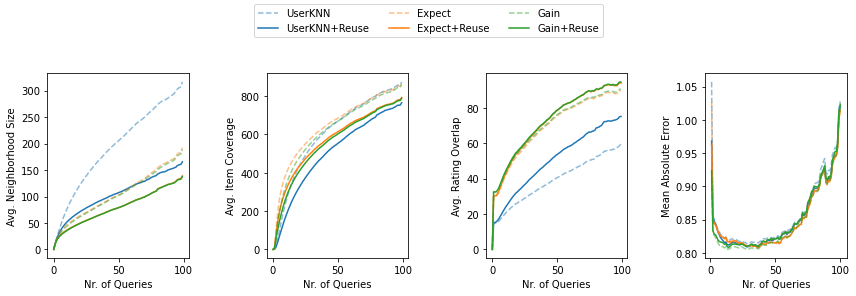

In [127]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].plot(range(n_queries), neighborhood_size_q["userknn"][k_idx][:n_queries], c="C0", linestyle="dashed", alpha=0.5)
axes[0].plot(range(n_queries), neighborhood_size_q["userknn_reuse"][k_idx][:n_queries], c="C0")
axes[0].plot(range(n_queries), neighborhood_size_q["expect"][k_idx][:n_queries], c="C1", linestyle="dashed", alpha=0.5)
axes[0].plot(range(n_queries), neighborhood_size_q["expect_reuse"][k_idx][:n_queries], c="C1")
axes[0].plot(range(n_queries), neighborhood_size_q["gain"][k_idx][:n_queries], c="C2", linestyle="dashed", alpha=0.5)
axes[0].plot(range(n_queries), neighborhood_size_q["gain_reuse"][1][:n_queries], c="C2")
axes[0].set_ylabel("Avg. Neighborhood Size")
axes[0].set_xlabel("Nr. of Queries")

axes[1].plot(range(n_queries), item_coverage_q["userknn"][k_idx][:n_queries], c="C0", linestyle="dashed", alpha=0.5)
axes[1].plot(range(n_queries), item_coverage_q["userknn_reuse"][k_idx][:n_queries], c="C0")
axes[1].plot(range(n_queries), item_coverage_q["expect"][k_idx][:n_queries], c="C1", linestyle="dashed", alpha=0.5)
axes[1].plot(range(n_queries), item_coverage_q["expect_reuse"][k_idx][:n_queries], c="C1")
axes[1].plot(range(n_queries), item_coverage_q["gain"][k_idx][:n_queries], c="C2", linestyle="dashed", alpha=0.5)
axes[1].plot(range(n_queries), item_coverage_q["gain_reuse"][k_idx][:n_queries], c="C2")
axes[1].set_ylabel("Avg. Item Coverage")
axes[1].set_xlabel("Nr. of Queries")

axes[2].plot(range(n_queries), rating_overlap_q["userknn"][k_idx][:n_queries], c="C0", linestyle="dashed", alpha=0.5)
axes[2].plot(range(n_queries), rating_overlap_q["userknn_reuse"][k_idx][:n_queries], c="C0")
axes[2].plot(range(n_queries), rating_overlap_q["expect"][k_idx][:n_queries], c="C1", linestyle="dashed", alpha=0.5)
axes[2].plot(range(n_queries), rating_overlap_q["expect_reuse"][k_idx][:n_queries], c="C1")
axes[2].plot(range(n_queries), rating_overlap_q["gain"][k_idx][:n_queries], c="C2", linestyle="dashed", alpha=0.5)
axes[2].plot(range(n_queries), rating_overlap_q["gain_reuse"][k_idx][:n_queries], c="C2")
axes[2].set_ylabel("Avg. Rating Overlap")
axes[2].set_xlabel("Nr. of Queries")

axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["userknn"][k_idx][1:n_queries+1], c="C0", linestyle="dashed", alpha=0.5)
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["userknn_reuse"][k_idx][1:n_queries+1], c="C0")
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["expect"][k_idx][1:n_queries+1], c="C1", linestyle="dashed", alpha=0.5)
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["expect_reuse"][k_idx][1:n_queries+1], c="C1")
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["gain"][k_idx][1:n_queries+1], c="C2", linestyle="dashed", alpha=0.5)
axes[3].plot(range(1, n_queries+1), mean_absolute_error_q["gain_reuse"][k_idx][1:n_queries+1], c="C2")
axes[3].set_ylabel("Mean Absolute Error")
axes[3].set_xlabel("Nr. of Queries")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.11, hspace=0.35, wspace=0.55)
fig.align_ylabels(axes)

In [277]:
import pickle as pl
significance_tests = pl.load(open("results/unprotected/ml-100k/significance_test_results.pkl", "rb"))
significance_tests["gain"][0]["avg_neighborhood_size_q"]["<"][0][:100]

[{'p': inf, 'sample_size': 940, 'r': nan, 'U': nan},
 {'p': inf, 'sample_size': 940, 'r': nan, 'U': nan},
 {'p': 5.091098412493085e-133,
  'sample_size': 931,
  'r': 0.5529177749934937,
  'U': 710148.5},
 {'p': 9.907689014631493e-204,
  'sample_size': 907,
  'r': 0.7113952427363026,
  'U': 749299.5},
 {'p': 8.397156657367464e-232,
  'sample_size': 870,
  'r': 0.7773802734795267,
  'U': 718260.0},
 {'p': 1.3735120107919538e-240,
  'sample_size': 821,
  'r': 0.8161042742945208,
  'U': 654710.5},
 {'p': 1.1054297839245723e-237,
  'sample_size': 771,
  'r': 0.8372851873819056,
  'U': 584670.5},
 {'p': 1.6084428081073805e-226,
  'sample_size': 712,
  'r': 0.8505210121952242,
  'U': 502493.5},
 {'p': 3.95239836121965e-214,
  'sample_size': 667,
  'r': 0.8541988871870548,
  'U': 441933.5},
 {'p': 3.9639513546065445e-199,
  'sample_size': 617,
  'r': 0.8561672537781955,
  'U': 378598.5},
 {'p': 4.0949985166553663e-187,
  'sample_size': 580,
  'r': 0.8557117664138183,
  'U': 334468.5},
 {'p': 3

In [218]:
import pickle as pl
from scipy.stats import spearmanr, pearsonr, kendalltau
recommendation_frequency_userknn = pl.load(open("results/unprotected/ml-100k/recommendation_frequency_userknn.pkl", "rb"))
recommendation_frequency_userknn_reuse = pl.load(open("results/unprotected/ml-100k/recommendation_frequency_userknn_reuse.pkl", "rb"))
recommendation_frequency_expect = pl.load(open("results/unprotected/ml-100k/recommendation_frequency_expect.pkl", "rb"))
recommendation_frequency_expect_reuse = pl.load(open("results/unprotected/ml-100k/recommendation_frequency_expect_reuse.pkl", "rb"))
recommendation_frequency_gain = pl.load(open("results/unprotected/ml-100k/recommendation_frequency_gain.pkl", "rb"))
recommendation_frequency_gain_reuse = pl.load(open("results/unprotected/ml-100k/recommendation_frequency_gain_reuse.pkl", "rb"))

In [180]:
df = pd.read_csv("data/ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
item_popularity = df.groupby("item_id").size() / df["user_id"].nunique()

In [219]:
def f(x, y):
    k_idx = 1
    keys = set(x[k_idx].keys()).union(y[k_idx].keys())
    key_map = {b: a for a, b in enumerate(keys)}

    freq1 = np.zeros(len(keys))
    for riid, freq in x[k_idx].items():
        freq1[key_map[riid]] = freq

    freq2 = np.zeros(len(keys))
    for riid, freq in y[k_idx].items():
        freq2[key_map[riid]] = freq

    difference = freq1 - freq2
    pop = np.zeros(len(keys))
    for riid in keys:
        pop[key_map[riid]] = item_popularity[riid]

    print(spearmanr(difference, pop))
    print(pearsonr(difference, pop))
    print(kendalltau(difference, pop))
    

print("UserKNN vs. UserKNN+Reuse")
f(recommendation_frequency_userknn, recommendation_frequency_userknn_reuse)
print()
print()
print("UserKNN vs. Expect")
f(recommendation_frequency_userknn, recommendation_frequency_expect)
print()
print("UserKNN vs. Expect+Reuse")
f(recommendation_frequency_userknn, recommendation_frequency_expect_reuse)
print()
print()
print("UserKNN vs. Gain")
f(recommendation_frequency_userknn, recommendation_frequency_gain)
print()
print("UserKNN vs. Gain+Reuse")
f(recommendation_frequency_userknn, recommendation_frequency_gain_reuse)

UserKNN vs. UserKNN+Reuse
SpearmanrResult(correlation=-0.18782427469445517, pvalue=2.46232039182049e-07)
(-0.4045433994407495, 1.1524728745902844e-30)
KendalltauResult(correlation=-0.11825492007878811, pvalue=2.807783553876855e-06)


UserKNN vs. Expect
SpearmanrResult(correlation=-0.1835361559671498, pvalue=4.639283095494523e-07)
(-0.43960972113708174, 1.659360645303557e-36)
KendalltauResult(correlation=-0.10941932605717626, pvalue=1.2156463571316894e-05)

UserKNN vs. Expect+Reuse
SpearmanrResult(correlation=-0.1984197514977277, pvalue=4.9321458071709315e-08)
(-0.43403554203437256, 1.7406371449895017e-35)
KendalltauResult(correlation=-0.11774132398239424, pvalue=2.467398297050771e-06)


UserKNN vs. Gain
SpearmanrResult(correlation=-0.26075671965338926, pvalue=4.014110117101596e-13)
(-0.5043613131667155, 1.2075682544430971e-49)
KendalltauResult(correlation=-0.1657471112693801, pvalue=2.8299633664187413e-11)

UserKNN vs. Gain+Reuse
SpearmanrResult(correlation=-0.22882055252738928, pvalue

In [221]:
def f(x, y):
    k_idx = 1
    keys = set(x[k_idx].keys()).union(y[k_idx].keys())
    key_map = {b: a for a, b in enumerate(keys)}

    freq1 = np.zeros(len(keys))
    for riid, freq in x[k_idx].items():
        freq1[key_map[riid]] = freq

    freq2 = np.zeros(len(keys))
    for riid, freq in y[k_idx].items():
        freq2[key_map[riid]] = freq

    difference = freq1 - freq2
    pop = np.zeros(len(keys))
    for riid in keys:
        pop[key_map[riid]] = item_popularity[riid]
    
    
        
    
print("UserKNN vs. UserKNN+Reuse")
f(recommendation_frequency_userknn, recommendation_frequency_userknn_reuse)
print()
print()
print("UserKNN vs. Expect")
f(recommendation_frequency_userknn, recommendation_frequency_expect)
print()
print("UserKNN vs. Expect+Reuse")
f(recommendation_frequency_userknn, recommendation_frequency_expect_reuse)
print()
print()
print("UserKNN vs. Gain")
f(recommendation_frequency_userknn, recommendation_frequency_gain)
print()
print("UserKNN vs. Gain+Reuse")
f(recommendation_frequency_userknn, recommendation_frequency_gain_reuse)

In [246]:
def f(x):
    n_popular_recs = 0
    for iid, freq in x[1].items():
        if iid in popular_items:
            n_popular_recs += freq
    print(n_popular_recs)
    
n = np.round(0.2 * len(item_popularity)).astype(int)
popular_items = item_popularity.sort_values().tail(n).index

f(recommendation_frequency_userknn)
f(recommendation_frequency_userknn_reuse)
print()
f(recommendation_frequency_expect)
f(recommendation_frequency_expect_reuse)
print()
f(recommendation_frequency_gain)
f(recommendation_frequency_gain_reuse)

5294.4
5572.999999999996

5966.599999999997
5881.5999999999985

6096.6
5988.399999999999


In [251]:
df[df["item_id"].isin(popular_items)]["rating"].mean()

3.701573840511305

In [252]:
df[~df["item_id"].isin(popular_items)]["rating"].mean()

3.2162460077442696